Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам. 

# Первичный осмотр данных:

In [319]:
from scipy.stats import ttest_ind
from itertools import combinations
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', 50) # показывать больше колонок
df = pd.read_csv('stud_math.csv')

In [320]:
# Посмотрим, какие данные хранятся в файле
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [272]:
# Определим общее кол-во строк и столбцов датасета проекта

print(
    f'Датасет проекта содержит {df.shape[0]} строк и {df.shape[1]} столбцов.\n')

Датасет проекта содержит 395 строк и 30 столбцов.



In [273]:
# Подсчитаем количество столбцов по типам данных
print(df.dtypes.value_counts())

object     17
float64    12
int64       1
dtype: int64


In [110]:
# Посмотрим основные статистические характеристики по каждому числовому признаку
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


In [111]:
# Посмотрим сводные статистики по категорийным признакам Для удобства транспонируем вывод.
df.describe(include='O').T

,count,unique,top,freq
school,395,2,GP,349
sex,395,2,F,208
address,378,2,U,295
famsize,368,2,GT3,261
Pstatus,350,2,T,314
Mjob,376,5,other,133
Fjob,359,5,other,197
reason,378,4,course,137
guardian,364,3,mother,250
schoolsup,386,2,no,335


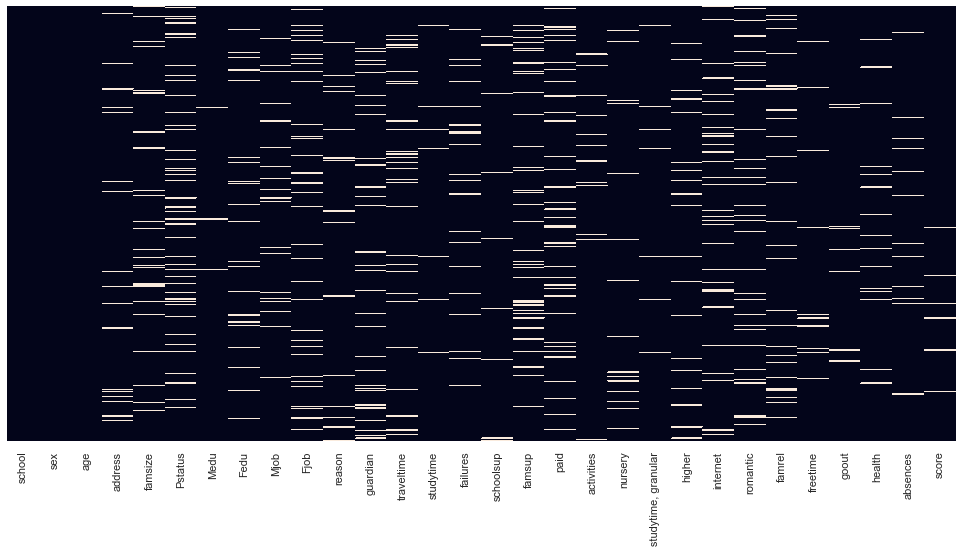

In [274]:
sns.set(rc={'figure.figsize': (17, 8)}, font_scale=1)
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.show()

In [275]:
# Определим кол-во столбцов, содержащих пустые значения
print(f'В {df.isnull().any().sum()} столбцах есть отсутствующие значения.')

В 27 столбцах есть отсутствующие значения.


In [276]:
# Посмотрим абс и относит величину пропущенных значений по каждому признаку
print('Признаки, в которых есть данные с пропущенными значениями\n\n{k}'
      .format(k=pd.DataFrame({'count': df.isnull().sum(),
                              'ratio': df.isnull().sum()/len(df)})))

Признаки, в которых есть данные с пропущенными значениями

                     count     ratio
school                   0  0.000000
sex                      0  0.000000
age                      0  0.000000
address                 17  0.043038
famsize                 27  0.068354
Pstatus                 45  0.113924
Medu                     3  0.007595
Fedu                    24  0.060759
Mjob                    19  0.048101
Fjob                    36  0.091139
reason                  17  0.043038
guardian                31  0.078481
traveltime              28  0.070886
studytime                7  0.017722
failures                22  0.055696
schoolsup                9  0.022785
famsup                  39  0.098734
paid                    40  0.101266
activities              14  0.035443
nursery                 16  0.040506
studytime, granular      7  0.017722
higher                  20  0.050633
internet                34  0.086076
romantic                31  0.078481
famrel          

In [321]:
# Проверим, есть ли в датасете столбцы с одним уникальным значением
one_value_cols = [col for col in df.columns if df[col].nunique() <= 1]
print(f'В датасете {len(one_value_cols)} столбцов, содержащих одно уникальное значение.' if len(one_value_cols) != 0
      else 'В датасете нет столбцов, содержащих только одно уникальное значение.')

В датасете нет столбцов, содержащих только одно уникальное значение.


В большинстве столбцов есть недостающие данные. 
Столбцов с одним уникальным значением (или где все данные отсутствующие) - нет.
Категориальных признаков больше, чем количественных. 

В дальнейшем все значения nan заменим на None.

In [322]:
# Для удобства, приведем названия всех столбцов к строчным буквам и при наличии двух слов - подчеркивание между словами
df.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
              'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
              'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
              'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
              'freetime', 'goout', 'health', 'absences', 'score']

In [279]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

### Теперь рассмотрим все столбцы по отдельности. 

In [323]:
'''Создаю функцию по обработке номинативных признаков 
(заполнение значения nan значением None, 
вывод количества уникальных значений и вывод графика countplot)
'''


def viewing_nominative_features(df, column):
    print(pd.DataFrame({'count': df[column].value_counts(dropna=False),
                        'ratio': df[column].value_counts(dropna=False, normalize=True)}))
    if df[column].isnull().any() == True:
        df[column] = df[column].astype(str).apply(
            lambda x: None if pd.isnull(x) else None if x == 'nan' else x)
        print(df[column].unique())
    return sns.countplot(x=column, data=df)

### 1) school - аббревиатура школы, в которой учится ученик

    count     ratio
GP    349  0.883544
MS     46  0.116456


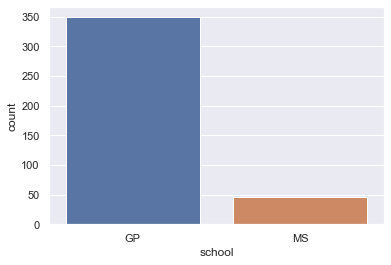

In [324]:
viewing_nominative_features(df, 'school')

В столбце school есть всего два уникальных значения: GP и MS. Причем GP много больше MS. Пустых значений нет

### 2) sex - пол ученика ('F' - женский, 'M' - мужской)

   count     ratio
F    208  0.526582
M    187  0.473418


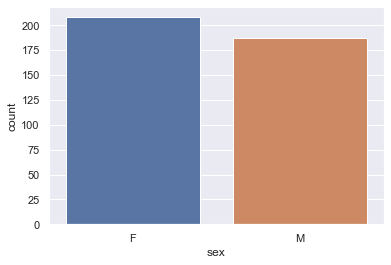

In [325]:
viewing_nominative_features(df, 'sex')

В столбце sex распределение по полу примерно одинаковое, за небольшим превышением девочек. Отсутствующих значений нет.

### 3) age - возраст ученика (от 15 до 22)

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

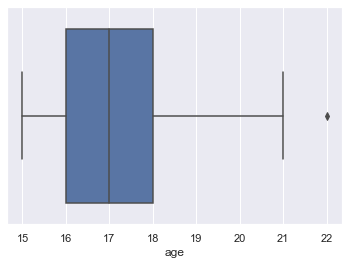

In [326]:
print(df.age.value_counts(dropna=False))
sns.boxplot(df.age)
df.age.describe()

In [327]:
median = df.age.median()
perc25 = df.age.quantile(0.25)
perc75 = df.age.quantile(0.75)
IQR = perc75 - perc25

print("IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Text(0.5, 1.0, 'Распределение учащихся по возрасту')

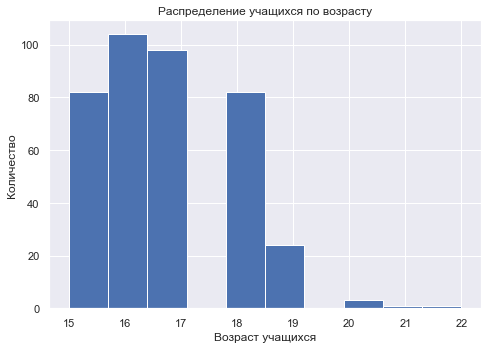

In [328]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df.age)
axes.set_xlabel('Возраст учащихся')
axes.set_ylabel('Количество')
axes.set_title('Распределение учащихся по возрасту')

В столбце age нет отсутствующих значений. 
График boxplot показывает, что имеются выбросы. Границы выбросов: [13.0, 21.0]. 
Но мы не будем исключать эти данные, так как в датасете есть всего 1 ученик, возраст которого 22 года.

### 4) address - тип адреса ученика ('U' - городской, 'R' - за городом)

     count     ratio
U      295  0.746835
R       83  0.210127
NaN     17  0.043038
['U' None 'R']


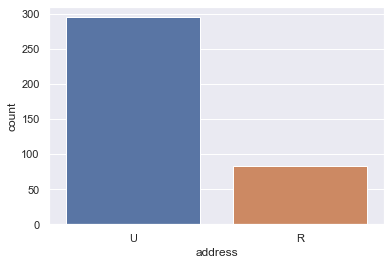

In [329]:
viewing_nominative_features(df,'address')

Проживающих в городе учеников намного больше, чем за городом.
В столбце address присутствовали отсутствующие значения, которые мы заполнили значением None.

### 5) famsize — размер семьи('LE3' <= 3, 'GT3' >3)

     count     ratio
GT3    261  0.660759
LE3    107  0.270886
NaN     27  0.068354
[None 'GT3' 'LE3']


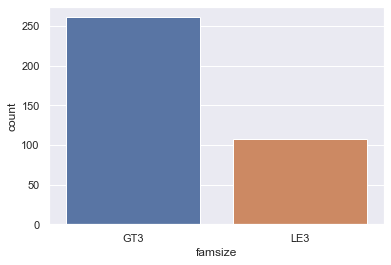

In [330]:
viewing_nominative_features(df,'famsize')

В датасете преобладает количество учеников, у которых размер семьи больше 3.

В столбце famsize присутствовали отсутствующие значения, которые мы заполнили значением None.

### 6) pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

     count     ratio
T      314  0.794937
NaN     45  0.113924
A       36  0.091139
['A' None 'T']


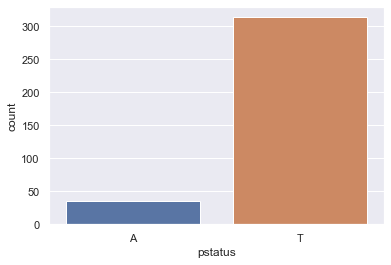

In [331]:
viewing_nominative_features(df,'pstatus')

У подавляющего большинства учеников родители живут вместе. 
Доля учеников, у которых родители живут раздельно меньше, чем доля учеников, у которых значение этого признака пропущено.


### 7) medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

     count     ratio
4.0    131  0.331646
2.0    102  0.258228
3.0     97  0.245570
1.0     59  0.149367
0.0      3  0.007595
NaN      3  0.007595
['4.0' '1.0' '3.0' '2.0' None '0.0']


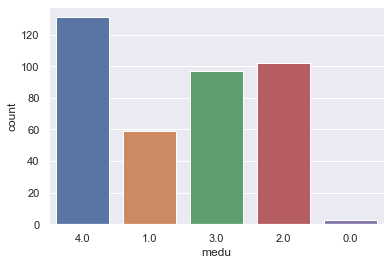

In [332]:
viewing_nominative_features(df, 'medu')

У 33% учеников матери с высшим образованием, приблизительно одинаковое соотношение (25% и 26%) учеников, у которых матери со средним образованием и неполным средним. У 15 % - матери отучились только в начальной школе. Менее 1% - без образования. 
Также менее 1% учеников не имеют никаких сведений об образовании матери. 

### 8) fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

      count     ratio
2.0     106  0.268354
3.0      96  0.243038
4.0      88  0.222785
1.0      78  0.197468
NaN      24  0.060759
0.0       2  0.005063
40.0      1  0.002532
['4.0' '1.0' '2.0' '3.0' '40.0' None '0.0']


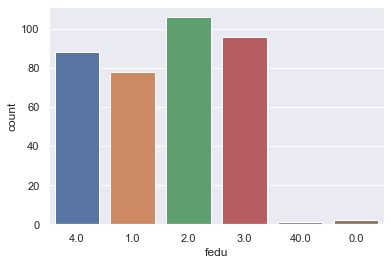

In [333]:
viewing_nominative_features(df, 'fedu')

In [334]:
df[df.fedu=='40.0']

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,None,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


У 22% учеников отцы с высшим образованием, у 24% - со средним образованием, 27% - с неполным средним. У 20 % - отцы имеют образование 1-4 кл., 0.5% - без образования. 

6 % учеников не имеют никаких сведений об образовании отцов. 

У одного ученика значение признака выходит за границы допустимых - что с этим делать?????
По данной семье: состав семьи > 3 человек, тратит на дорогу от 30 до 60 мин, есть доп. семейная образовательная поддержка, 
есть дополнительные внеучебные занятия, опекуном является отец, мало свободного времени, отличные семейные отношения, количество пропущенных занятий незначительное. 
Скорее всего опечатка - вместо 4 ввели 40. 
Пока исправлю 40 на 4.

Зачем надо заполнять значения nan значением None??????

In [335]:
df.fedu = df.fedu.apply(lambda x: '4.0' if x=='40.0' else x)
df.fedu.unique()

array(['4.0', '1.0', '2.0', '3.0', None, '0.0'], dtype=object)

### 9) mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

          count     ratio
other       133  0.336709
services     98  0.248101
at_home      58  0.146835
teacher      55  0.139241
health       32  0.081013
NaN          19  0.048101
['at_home' 'health' 'other' 'services' 'teacher' None]


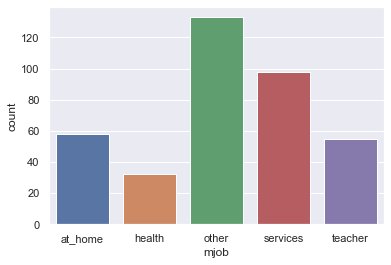

In [336]:
viewing_nominative_features(df, 'mjob')

### 10) fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

          count     ratio
other       197  0.498734
services    102  0.258228
NaN          36  0.091139
teacher      29  0.073418
at_home      16  0.040506
health       15  0.037975
['teacher' 'other' None 'health' 'services' 'at_home']


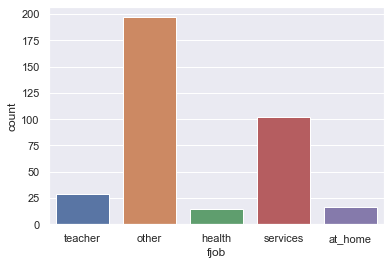

In [337]:
viewing_nominative_features(df, 'fjob')

У 9 % учеников значение признака fjob содержит отсутствующие значения - что с этим делать??? 9% - это вроде достаточно много.

### 11) reason  — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

            count     ratio
course        137  0.346835
home          104  0.263291
reputation    103  0.260759
other          34  0.086076
NaN            17  0.043038
['course' 'other' 'home' 'reputation' None]


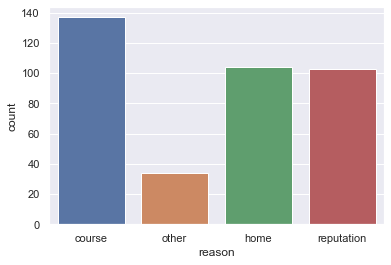

In [338]:
viewing_nominative_features(df, 'reason')

Среди причин выбора школы преобладает предлагаемая образовательная программа - 34%, затем идут в равном процентном соотношении репутация и близость к дому - по 26 %. Менее 9% - другая причина. Отсутствующие значения признака у 4% учеников. 


### 12) guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

        count     ratio
mother    250  0.632911
father     86  0.217722
NaN        31  0.078481
other      28  0.070886
['mother' 'father' 'other' None]


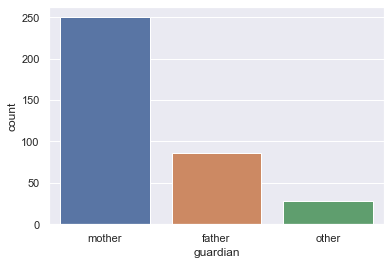

In [339]:
viewing_nominative_features(df, 'guardian')

У 63% учеников опекунами являются матери, у 21% - отцы, другое - 8%.

В данных 7% учеников значения признака guardian содержали отсутствующие значения.

### 13) traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

     count     ratio
1.0    242  0.612658
2.0     96  0.243038
NaN     28  0.070886
3.0     22  0.055696
4.0      7  0.017722
['2.0' '1.0' '3.0' None '4.0']


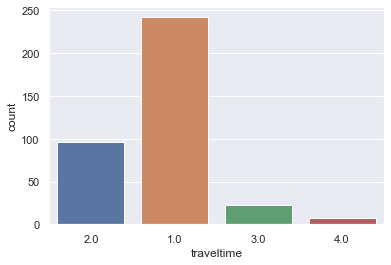

In [340]:
viewing_nominative_features(df, 'traveltime')

У большинства учеников (61%) время в пути до школы занимает менее 15 минут.

У 7% - переменная содержала отсутствующие значения. 

### 14) studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

     count     ratio
2.0    194  0.491139
1.0    103  0.260759
3.0     64  0.162025
4.0     27  0.068354
NaN      7  0.017722
['2.0' '3.0' '1.0' None '4.0']


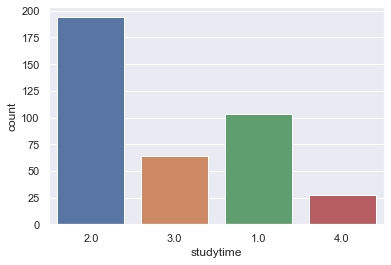

In [341]:
viewing_nominative_features(df, 'studytime')

Почти половина учеников (49%) занимается учёбой помимо школы в неделю от 2-х до 5-ти часов. 
26% занимается дополнительно менее 2-х часов в неделю.
Меньше всего - учеников, которые занимаются более 10 часов в неделю.
У 2% - переменная содержали отсутствующие значения. 

### 15) failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)

     count     ratio
0.0    293  0.741772
1.0     49  0.124051
NaN     22  0.055696
2.0     16  0.040506
3.0     15  0.037975
['0.0' '3.0' None '2.0' '1.0']


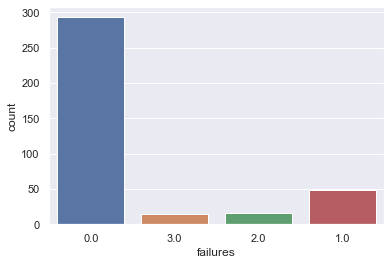

In [342]:
viewing_nominative_features(df, 'failures')

Не поняла, что за условие (n, если 1<=n<3, иначе 0)???? Если количество неудач 1 или 2 - то это количество, а если больше 2 или не было неудач совсем - 0???? Считаю, что признак можно совсем исключить из рассмотрения как неадекватный. По логике - ученик или вообще нигде не участвует и, соответственно нет никаких неудач, или у него слишком много неудач. И откуда взялось 3, если по условию 3 не входит в допустимый диапазон? Точно также и 1 - он один лишь раз поучаствовал и потерпел фиаско.

### 16) schoolsup — дополнительная образовательная поддержка (yes или no)

     count     ratio
no     335  0.848101
yes     51  0.129114
NaN      9  0.022785
['yes' 'no' None]


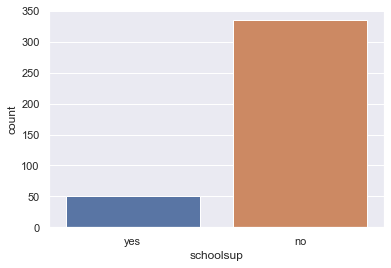

In [343]:
viewing_nominative_features(df, 'schoolsup')

Только 13% учеников получают дополнительную образовательную поддержку.

В 2% данных имелись отсутствующие значения.

### 17) famsup — семейная образовательная поддержка (yes или no)

     count     ratio
yes    219  0.554430
no     137  0.346835
NaN     39  0.098734
['no' 'yes' None]


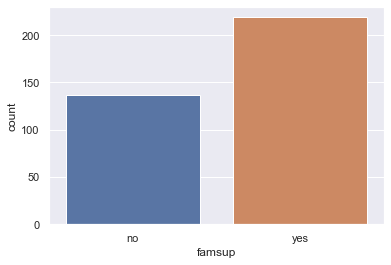

In [344]:
viewing_nominative_features(df, 'famsup')

55% учеников получают семейную образовательную поддержку. 
В 10% данных содержались отсутствующие значения.

### 18) paid — дополнительные платные занятия по математике (yes или no)

     count     ratio
no     200  0.506329
yes    155  0.392405
NaN     40  0.101266
['no' None 'yes']


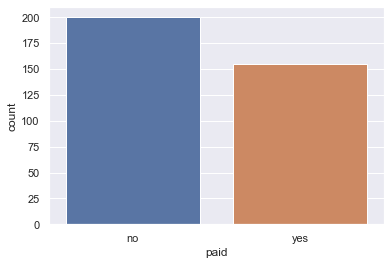

In [345]:
viewing_nominative_features(df, 'paid')

39% учеников посещают дополнительные платные занятия по математике. 
В 10% данных имелись отсутствующие значения.

### 19) activities — дополнительные внеучебные занятия (yes или no)

     count     ratio
yes    195  0.493671
no     186  0.470886
NaN     14  0.035443
['no' 'yes' None]


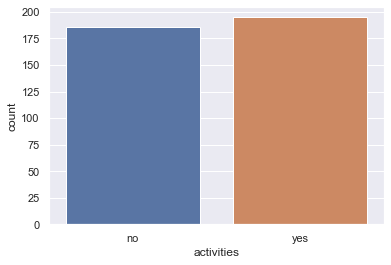

In [346]:
viewing_nominative_features(df, 'activities')

49% учеников посещают дополнительные внеучебные занятия. 
В 4% данных имеются отсутствующие значения.

### 20) studytime_granular

       count     ratio
-6.0     194  0.491139
-3.0     103  0.260759
-9.0      64  0.162025
-12.0     27  0.068354
 NaN       7  0.017722
['-6.0' '-9.0' '-3.0' None '-12.0']


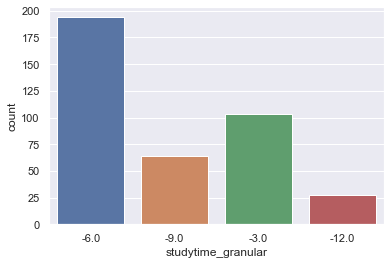

In [347]:
viewing_nominative_features(df, 'studytime_granular')

In [121]:
df[['studytime','studytime_granular']]

,studytime,studytime_granular
0,2.0,-6.0
1,2.0,-6.0
2,2.0,-6.0
3,3.0,-9.0
4,2.0,-6.0
...,...,...
390,2.0,-6.0
391,1.0,-3.0
392,1.0,-3.0
393,1.0,-3.0


Значения признака studytime_granular соответствуют studytime*(-3). Процентное распределение идентично признаку studytime,
поэтому можем исключить из дальнейшего рассмотрения.

### 21) nursery — посещал детский сад (yes или no)

     count     ratio
yes    300  0.759494
no      79  0.200000
NaN     16  0.040506
['yes' 'no' None]


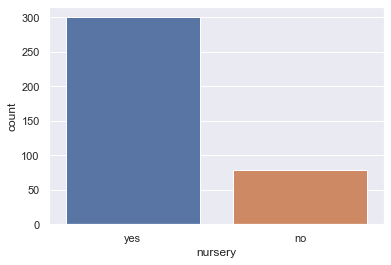

In [348]:
viewing_nominative_features(df, 'nursery')

Подавляющее большинство учеников (76%) посещали детский сад. 
В 4% данных имеются отсутствующие значения.

### 22) higher — хочет получить высшее образование (yes или no)

     count     ratio
yes    356  0.901266
NaN     20  0.050633
no      19  0.048101
['yes' None 'no']


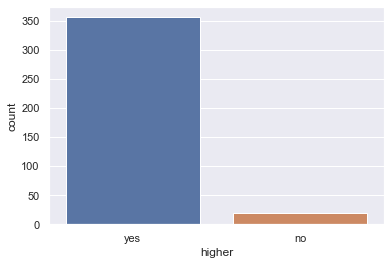

In [349]:
viewing_nominative_features(df, 'higher')

90% учеников хотят получить высшее образование. 
В 5% данных имеются отсутствующие значения.

### 23) internet — наличие интернета дома (yes или no)

     count     ratio
yes    305  0.772152
no      56  0.141772
NaN     34  0.086076
[None 'yes' 'no']


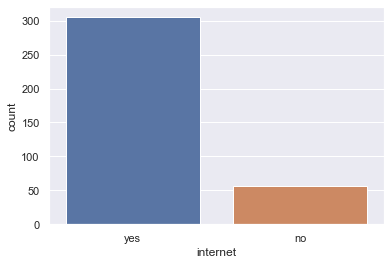

In [350]:
viewing_nominative_features(df, 'internet')

Интернет есть дома у 77% учеников. 
У 14% - интернета дома нет. В 8% данных имеются отсутствующие значения.

### 24) romantic — в романтических отношениях (yes или no)

     count     ratio
no     240  0.607595
yes    124  0.313924
NaN     31  0.078481
['no' None 'yes']


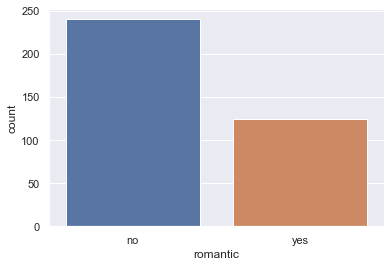

In [351]:
viewing_nominative_features(df, 'romantic')

31% - состоят в романтических отношениях, 61% - нет.
В 7% данных имеются отсутствующие значения.

### 25) famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

      count     ratio
 4.0    182  0.460759
 5.0     99  0.250633
 3.0     62  0.156962
 NaN     27  0.068354
 2.0     17  0.043038
 1.0      7  0.017722
-1.0      1  0.002532
['4.0' '5.0' '3.0' None '-1.0' '2.0' '1.0']


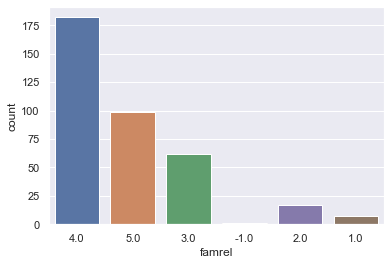

In [352]:
viewing_nominative_features(df, 'famrel')

Чаще всего семейные отношения оценены на 4 балла, почти в два раза меньше оценок семейных отношений в 5 баллов. Далее по убыванию идут оценки 3, 2, 1. 

Имеются отсутствующие значения и, возможно, ошибочное значение =-1. 

Что с ним сделать????

Решила исправить на 1.

In [353]:
df[df.famrel=='-1.0']

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,None,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,-3.0,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


Решила заменить на 1, так как скорее всего имеет место опечатка. Ребенок получает семейную образовательную поддержку, посещает платные доп. занятия, хочет получить высшее образование, не проводит много времени с друзьями, имеется опыт внеучебных неудач (хотя что понимается под внеучебными неудачами???).

In [354]:
df.famrel = df.famrel.astype(str).apply(lambda x: '1.0' if x == '-1.0' else x)
df.famrel.unique()

array(['4.0', '5.0', '3.0', 'None', '1.0', '2.0'], dtype=object)

### 26) freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

     count     ratio
3.0    153  0.387342
4.0    112  0.283544
2.0     63  0.159494
5.0     38  0.096203
1.0     18  0.045570
NaN     11  0.027848
['3.0' '2.0' '4.0' '1.0' '5.0' None]


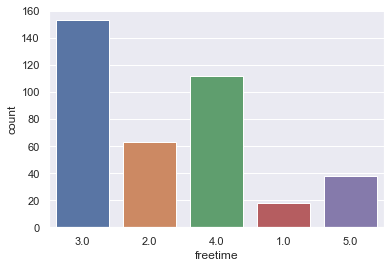

In [355]:
viewing_nominative_features(df, 'freetime')

Количество тех, у кого свободное время после школы оценено в 3 балла преобладает - 153. 
В данных имеются отсутствующие значения.

### 27) goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

     count     ratio
3.0    127  0.321519
2.0    101  0.255696
4.0     84  0.212658
5.0     52  0.131646
1.0     23  0.058228
NaN      8  0.020253
['4.0' '3.0' '2.0' '1.0' '5.0' None]


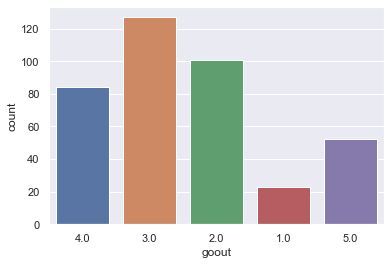

In [356]:
viewing_nominative_features(df, 'goout')

Количество тех, у кого показатель "проведение времени с друзьями"  оценен в 3 балла, преобладает - 127. 
В данных имеются отсутствующие значения.

### 28) health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

     count     ratio
5.0    138  0.349367
3.0     89  0.225316
4.0     63  0.159494
1.0     47  0.118987
2.0     43  0.108861
NaN     15  0.037975
['3.0' '5.0' '1.0' '2.0' '4.0' None]


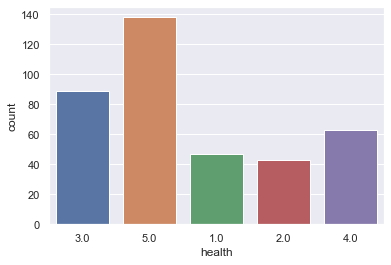

In [357]:
viewing_nominative_features(df, 'health')

Текущее состояние здоровья у учеников достаточно хорошее. У большей части состояние здоровья оценено в 5 баллов. 
В данных имеются отсутствующие значения.

### 29) absences — количество пропущенных занятий

In [358]:
# Посчитаем абс и относит значения по столбцу количества пропущенных занятий
print(pd.DataFrame({'count':df.absences.value_counts(dropna=False),
                    'ratio':df.absences.value_counts(normalize=True,dropna=False)}))
# Хотя пока не понимаю, для чего мне это нужно???

       count     ratio
0.0      111  0.281013
2.0       60  0.151899
4.0       53  0.134177
6.0       31  0.078481
8.0       21  0.053165
10.0      17  0.043038
12.0      12  0.030380
NaN       12  0.030380
14.0      12  0.030380
3.0        8  0.020253
16.0       7  0.017722
7.0        6  0.015190
5.0        5  0.012658
18.0       5  0.012658
20.0       4  0.010127
1.0        3  0.007595
22.0       3  0.007595
9.0        3  0.007595
13.0       2  0.005063
15.0       2  0.005063
11.0       2  0.005063
25.0       1  0.002532
54.0       1  0.002532
385.0      1  0.002532
26.0       1  0.002532
56.0       1  0.002532
24.0       1  0.002532
212.0      1  0.002532
21.0       1  0.002532
75.0       1  0.002532
30.0       1  0.002532
19.0       1  0.002532
38.0       1  0.002532
40.0       1  0.002532
23.0       1  0.002532
17.0       1  0.002532
28.0       1  0.002532


In [374]:
''' Надо заменить nan на None, но в случае с числовыми переменными это не срабатывает. ''' 

df['absences'] = df['absences'].replace(np.nan, None)
df.absences = df.absences.astype(float)



''' При замене, они меняют свой тип на object. А при обратном изменении типа данных с object на float 
они распределились по другим значениям. 
До замены nan на None 
        было   стало
0.0      111    117
2.0       60     62
6.0       31     32
10.0      17     18
12.0      12     13
14.0      12     13

Что надо делать? Оставлять как есть nan? Или надо было менять на 0?

 Наверно надо было поменять пропущенные значения на ноль, 
так как, наверно, можно предположить, что должно быть 0 пропусков, а пользователи просто оставили поле пустым. 
 Но пока оставила как получилось, так как не понимаю, как пропущенные значения распределились по другим значениям.
'''
print(df.absences.value_counts(dropna=False))

#df['absences'] = df['absences'].replace(np.NaN, 0)
#print(df.absences.value_counts())

0.0      117
2.0       62
4.0       53
6.0       32
8.0       21
10.0      18
12.0      13
14.0      13
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64


In [375]:
# Смотрим описательные статистики
df.absences.describe()

count    395.000000
mean       7.174684
std       23.129570
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Посмотрим границы выбросов:

25-й перцентиль: 0.0, медиана: 4.0, 75-й перцентиль: 8.0
 IQR: 8.0. Границы выбросов [-12.0,20.0]


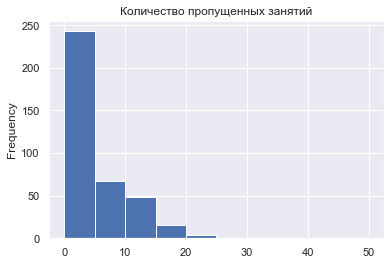

In [376]:
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
median = df.absences.median()
IQR = perc75-perc25
print('25-й перцентиль: {}, медиана: {}, 75-й перцентиль: {}\n'.format(perc25, median, perc75),
      'IQR: {}.'.format(IQR), 'Границы выбросов [{f},{k}]'.format(f=perc25-1.5*IQR, k=perc75+1.5*IQR))

df.absences.loc[df.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].plot(kind='hist',grid=True,range=(0, 50)
                                              ,title='Количество пропущенных занятий')


За границей 75-й перцентиль + 1.5*IQR, находятся данные по 17 ученикам.
     absences  score
260      21.0   90.0
198      24.0   90.0
222     385.0   85.0
320      23.0   65.0
315      40.0   55.0
313      22.0   55.0
74       54.0   55.0
40       25.0   55.0
276      75.0   45.0
277      22.0   45.0
205      28.0   45.0
390     212.0   45.0
280      30.0   40.0
307      38.0   40.0
183      56.0   40.0
103      26.0   30.0
216      22.0   20.0


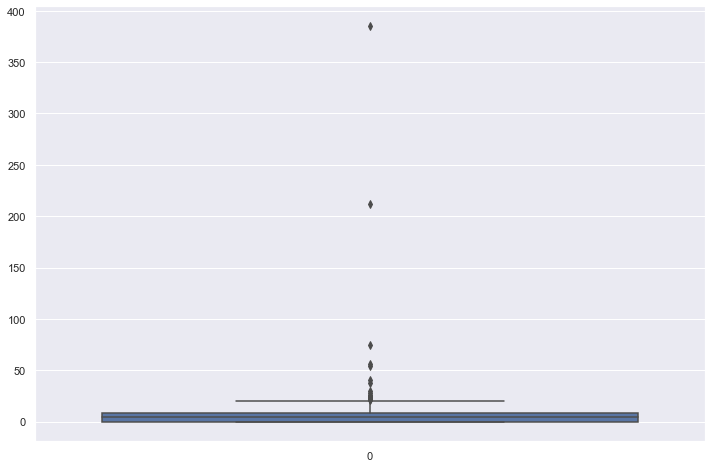

In [377]:
# Посмотрим как много данных находится за границей 75-й перцентиль + 1.5*IQR:
print(
    f'За границей 75-й перцентиль + 1.5*IQR, находятся данные по {len(df[df.absences>20.0])} ученикам.')

print(df[df.absences > 20.0][['absences', 'score']
                       ].sort_values(by='score', ascending=False))
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.absences, orient='v')

Здесь сразу бросается в глаза макс значения - 385, 212. То есть, имеется два ученика, которые пропустили очень много занятий. Если предположить, что это супер математическая школа, в которой по 2 занятия в день, и в одном месяце 20 учебных дней, получается, что они не посещали занятия 10 месяцев и 5 месяцев соответственно.

Посмотрим данные по двум ученикам, у которых больше всего пропусков:

In [378]:
df[df.absences>=212]

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
222,GP,F,16,U,GT3,T,2.0,3.0,services,teacher,other,mother,1.0,2.0,0.0,yes,None,no,no,yes,-6.0,yes,yes,no,2.0,3.0,1.0,3.0,385.0,85.0
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,None,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0


На данном этапе исключу из датасета обе записи. Остальные записи, находящиеся за правой границей выбросов пока оставлю.

In [379]:
df=df[df.absences<212]

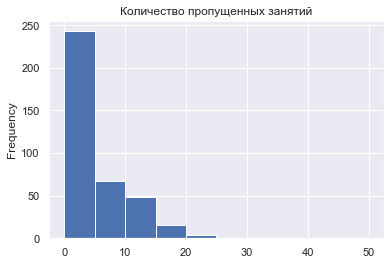

In [380]:
df.absences.describe()
df.absences.loc[df.absences.between(
    perc25 - 1.5*IQR, perc75 + 1.5*IQR)].plot(kind='hist',grid=True,range=(0, 50)
                                              ,title='Количество пропущенных занятий')

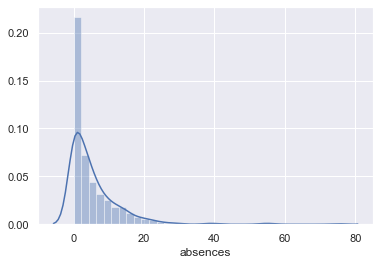

In [381]:
sns.distplot(df.absences)

### 30) score — баллы по госэкзамену по математике

In [382]:
# Посчитаем абс и относит значения по нашей предсказываемой переменной
print(pd.DataFrame({'count': df.score.value_counts(dropna=False),
                    'ratio': df.score.value_counts(normalize=True, dropna=False)}).sort_index())

       count     ratio
0.0       37  0.094148
20.0       1  0.002545
25.0       7  0.017812
30.0      15  0.038168
35.0       9  0.022901
40.0      31  0.078880
45.0      26  0.066158
50.0      54  0.137405
55.0      46  0.117048
60.0      31  0.078880
65.0      31  0.078880
70.0      27  0.068702
75.0      33  0.083969
80.0      16  0.040712
85.0       5  0.012723
90.0      12  0.030534
95.0       5  0.012723
100.0      1  0.002545
NaN        6  0.015267


Как лучше сделать - сортировку по индексу или по количеству???

In [383]:
print(pd.DataFrame({'count': df.score.value_counts(dropna=False),
                    'ratio': df.score.value_counts(normalize=True, dropna=False)}))

       count     ratio
50.0      54  0.137405
55.0      46  0.117048
0.0       37  0.094148
75.0      33  0.083969
65.0      31  0.078880
40.0      31  0.078880
60.0      31  0.078880
70.0      27  0.068702
45.0      26  0.066158
80.0      16  0.040712
30.0      15  0.038168
90.0      12  0.030534
35.0       9  0.022901
25.0       7  0.017812
NaN        6  0.015267
95.0       5  0.012723
85.0       5  0.012723
100.0      1  0.002545
20.0       1  0.002545


In [385]:
# Заменим nan на 0, так как будем считать, что это дети, которые по тем или иным причинам не сдавали экзамен:
df['score'] = df['score'].replace(np.nan, 0)

print(pd.DataFrame({'count': df.score.value_counts(dropna=False),
                    'ratio': df.score.value_counts(normalize=True, dropna=False)}))

       count     ratio
50.0      54  0.137405
55.0      46  0.117048
0.0       43  0.109415
75.0      33  0.083969
65.0      31  0.078880
40.0      31  0.078880
60.0      31  0.078880
70.0      27  0.068702
45.0      26  0.066158
80.0      16  0.040712
30.0      15  0.038168
90.0      12  0.030534
35.0       9  0.022901
25.0       7  0.017812
85.0       5  0.012723
95.0       5  0.012723
100.0      1  0.002545
20.0       1  0.002545


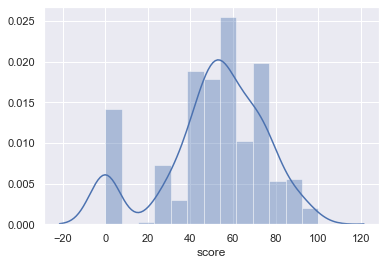

In [386]:
sns.distplot(df.score)

In [ ]:
''' Надо ли приводить к типу данных category???

Функцию приготовила, но не использовала. Решила дождаться ответа.'''


def df_columns_to_category(df, column_list):
    df[column_list] = df[column_list].astype('category', errors='ignore')


col_list = df.select_dtypes(include='O').columns

df_columns_to_category(df, col_list)
df.info()

Предсказываемая величина score

In [ ]:
#sns.pairplot(df,vars=df.columns[:-1], hue='score') 
'''Выходят ошибки'''

In [390]:
df.corr()

,age,absences,score
age,1.000000,0.156916,-0.184754
absences,0.156916,1.000000,0.044626
score,-0.184754,0.044626,1.000000


In [405]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

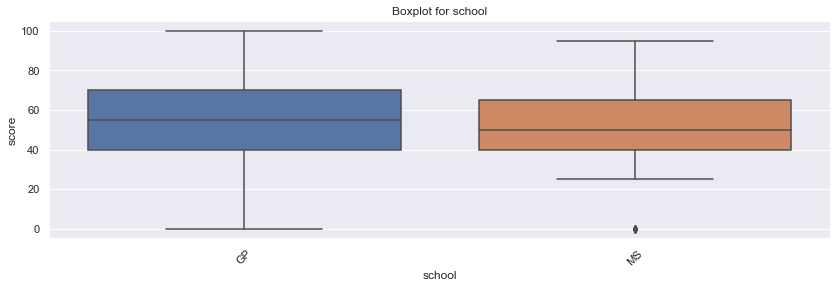

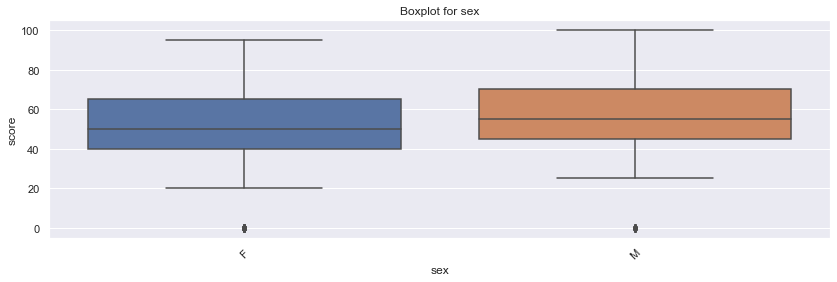

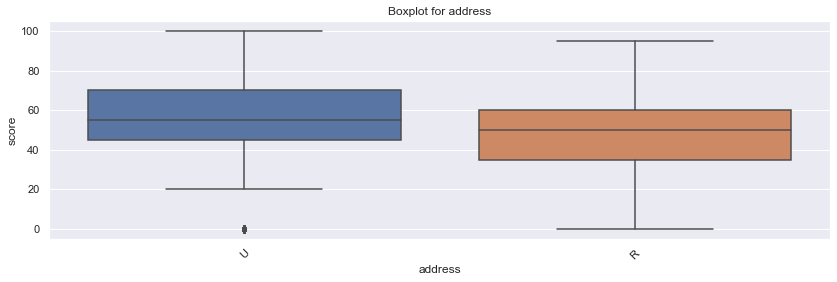

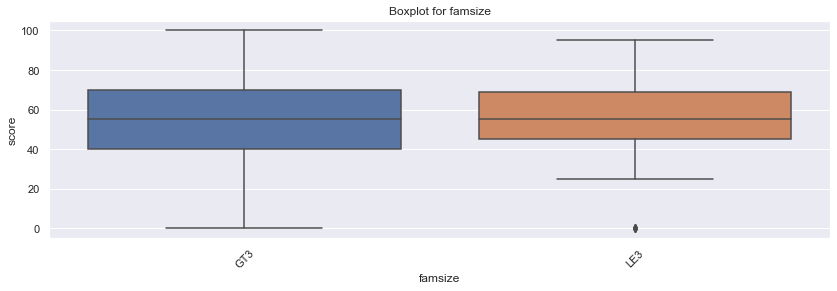

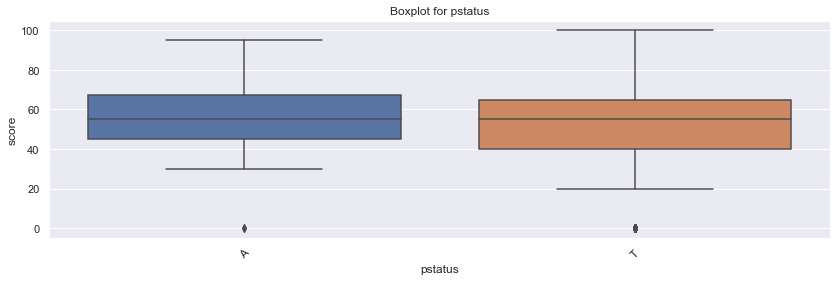

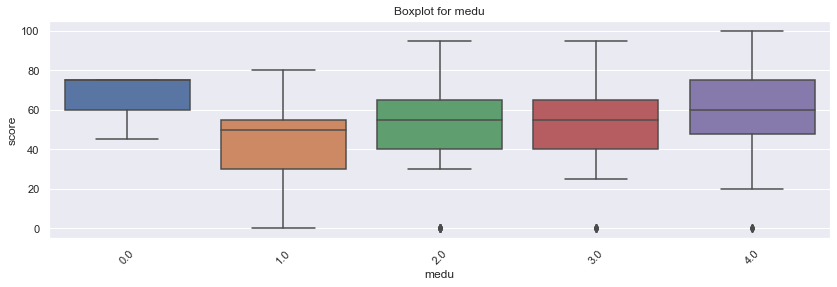

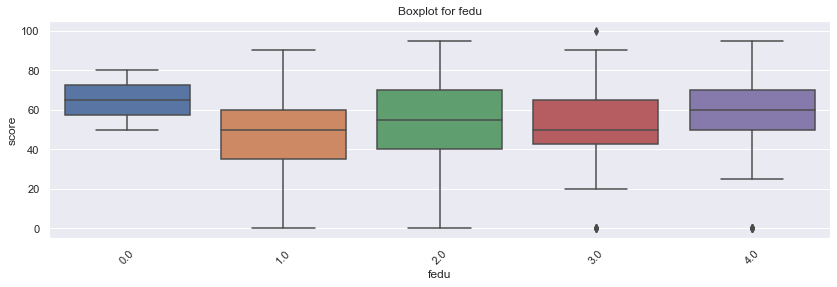

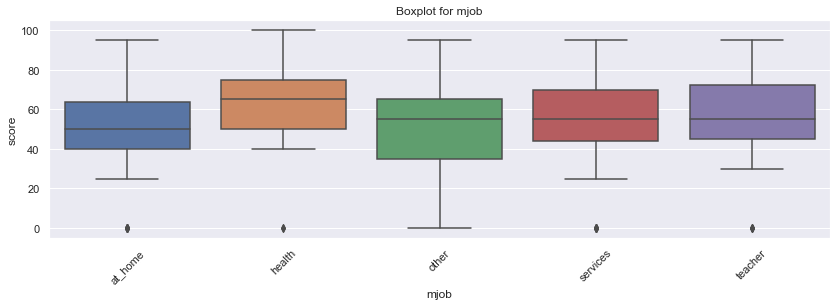

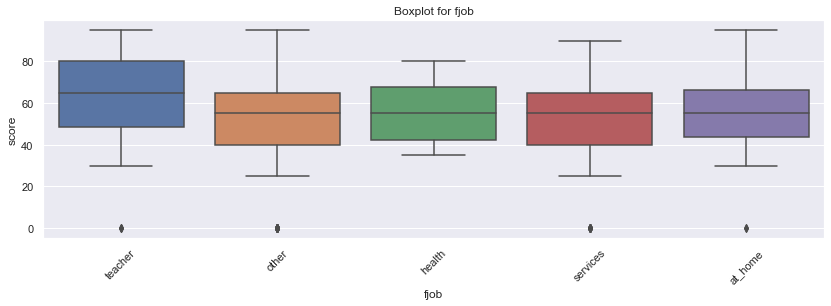

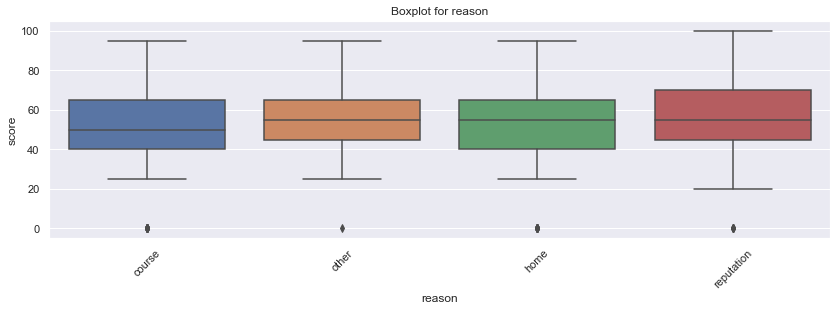

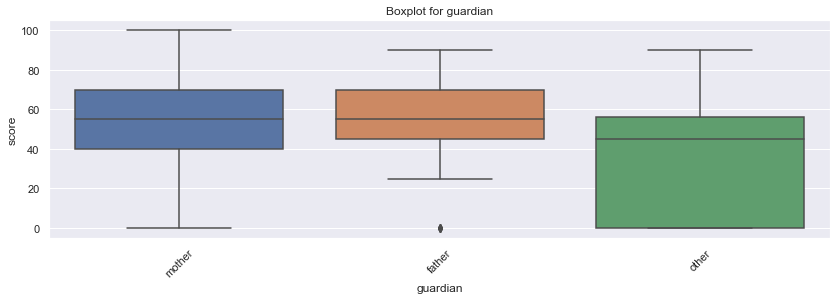

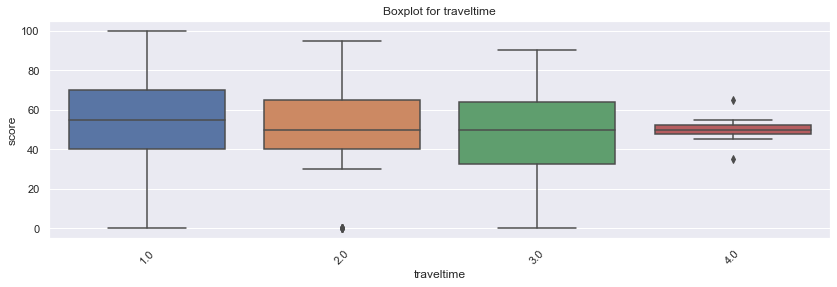

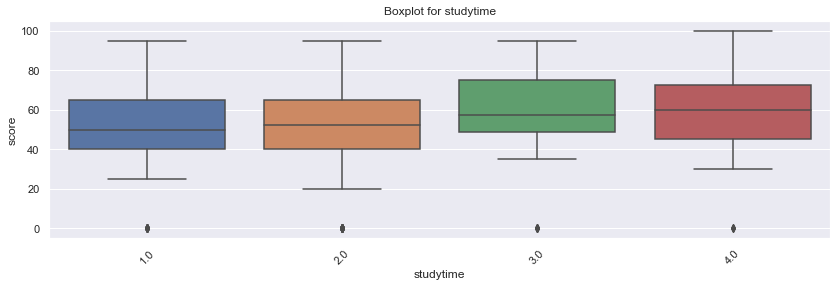

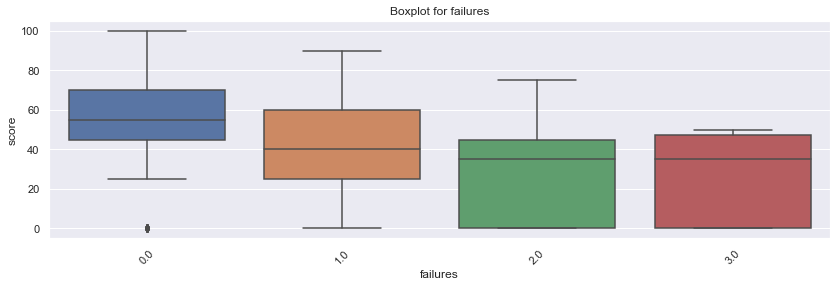

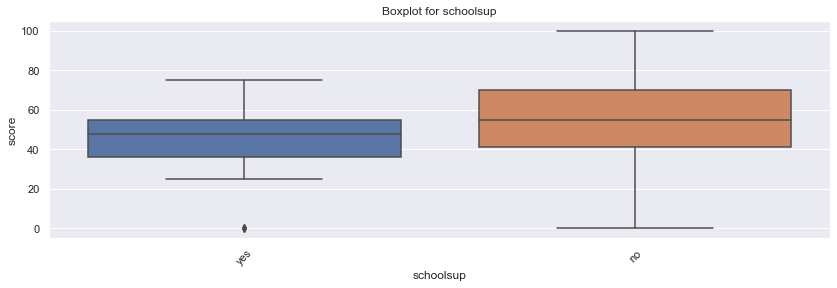

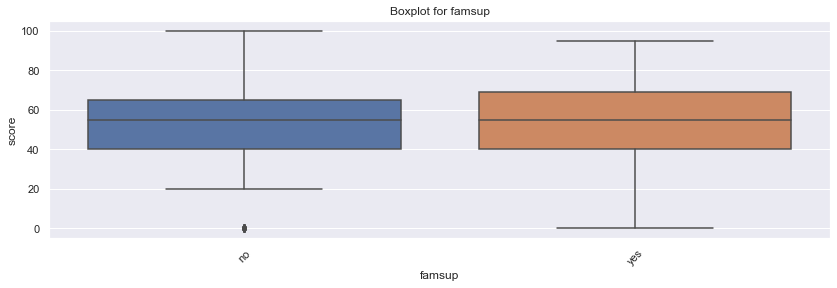

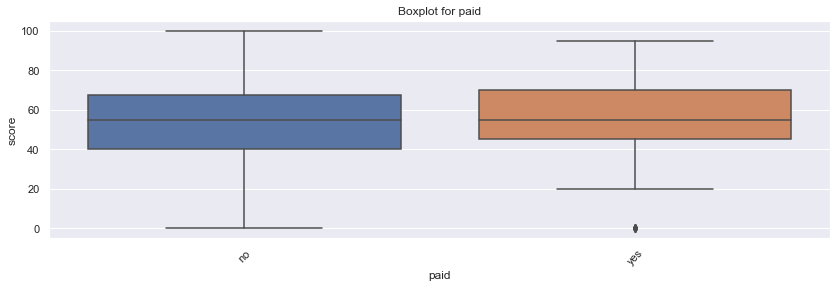

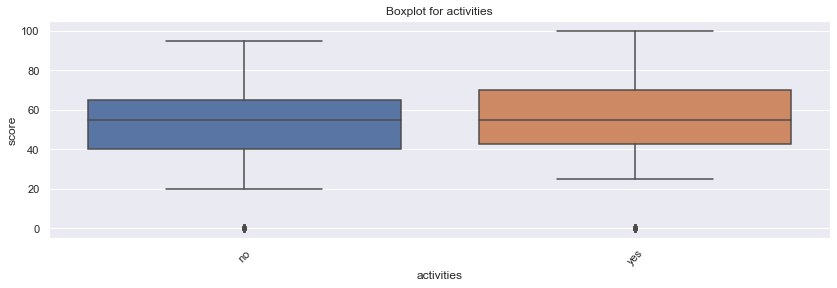

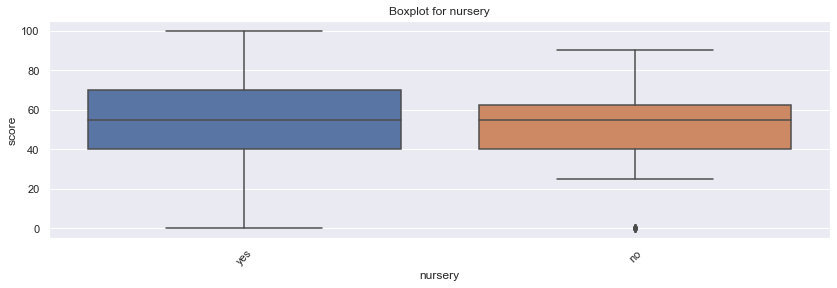

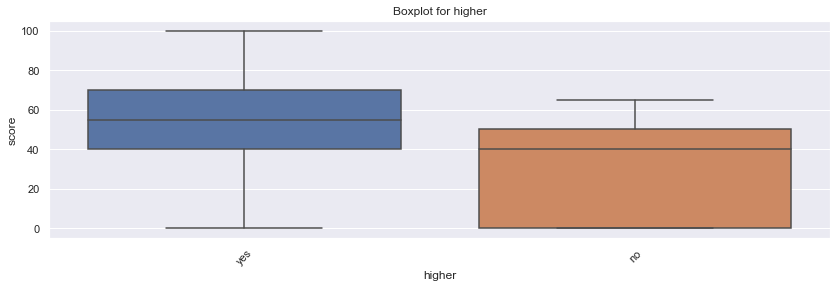

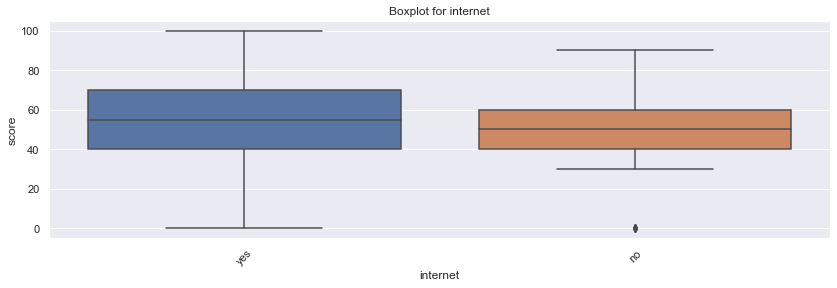

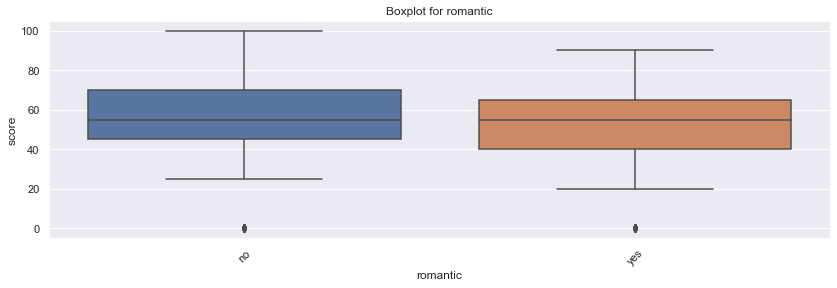

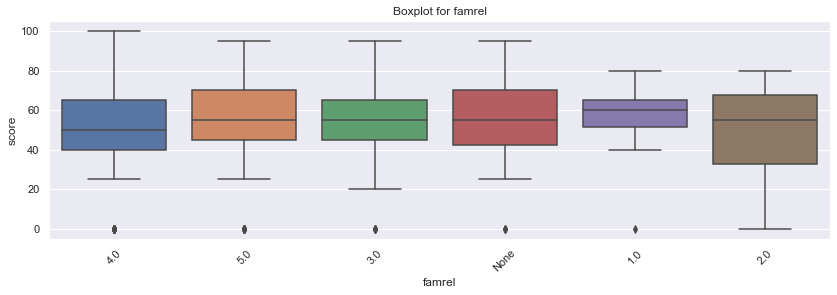

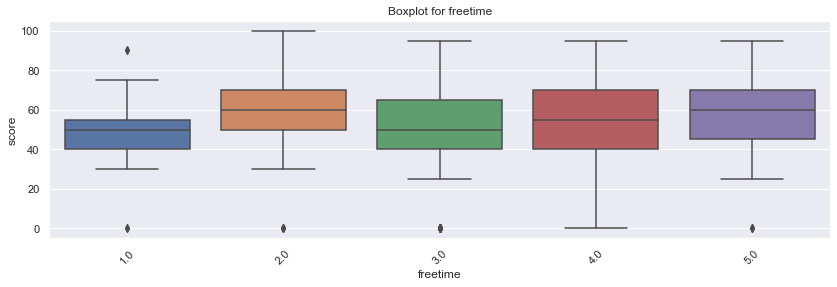

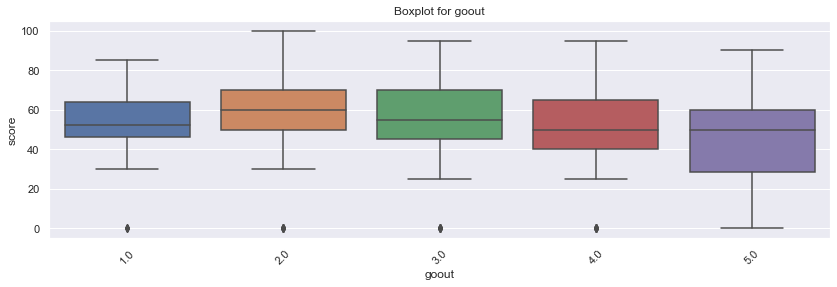

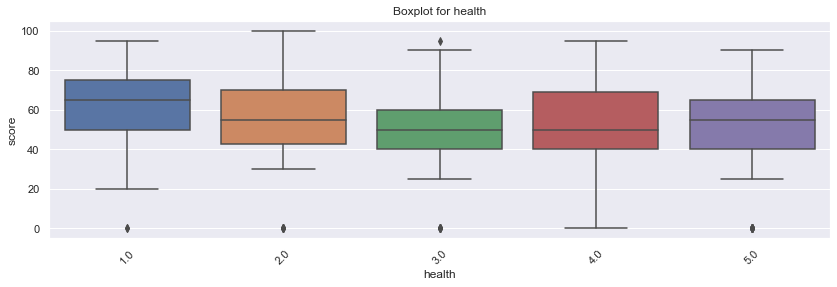

In [406]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

In [396]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [397]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
            'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
            'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки goout


### Вывод: 

#### Признаки, которые, возможно, оказывают влияние на оценку, это: пол, адрес, образование родителей, их работа, внеучебные неудачи, образовательная поддержка школы, стремление к получению высшего образования, наличие романтических отношений и время, затрачиваемое на друзей.

In [399]:
df_for_model = df.loc[:, ['sex', 'address', 'medu', 'fedu', 'mjob', 'guardian', 
                          'failures', 'schoolsup', 'higher', 'romantic', 'goout']]
df_for_model.head(10)

,sex,address,medu,fedu,mjob,guardian,failures,schoolsup,higher,romantic,goout
0,F,U,4.0,4.0,at_home,mother,0.0,yes,yes,no,4.0
1,F,U,1.0,1.0,at_home,father,0.0,no,yes,no,3.0
2,F,U,1.0,1.0,at_home,mother,3.0,yes,yes,None,2.0
3,F,U,4.0,2.0,health,mother,0.0,no,yes,yes,2.0
4,F,U,3.0,3.0,other,father,0.0,no,yes,no,2.0
5,M,U,4.0,3.0,services,mother,0.0,no,yes,no,2.0
6,M,None,2.0,2.0,other,mother,0.0,no,yes,no,4.0
7,F,U,4.0,4.0,other,mother,0.0,yes,yes,no,4.0
8,M,U,3.0,2.0,services,mother,0.0,no,yes,no,2.0
9,M,U,3.0,4.0,other,mother,0.0,no,yes,no,1.0
